<a href="https://colab.research.google.com/github/laieeqa/machine-learning/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE : Exporatory Data Analysis Of Car Features**

**DESCRIPTION :**  
In this project, we have a look into the data related to used cars and understand the relationships among various variables and figure out the features which have a maximum impact on price.The data comes
from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car
models, sold in the USA between 1990 and 2017, with the market price (new or used) 

**What is Exporatory Data analysis ?**
Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their important characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

## Importing the required libraries

In [1]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Formatting the data into a data frame



Since the data set is in a CSV format. we should format the data into a pandas data frame. This can be done by using a pandas data frame method called (read_csv) by importing pandas library

In [3]:
# Loading the CSV file into a pandas dataframe.
df=pd.read_csv("data.csv")

**veiwing the data**

In [4]:
#top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
#bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## Summarize the Dataset

**Dimensions of Dataset**



In [6]:
# shape 
print(df.shape) 

(11914, 16)


In [7]:
#column names 
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

 **Distribution**

In [8]:
#distribution 
print(df.groupby('Make').size()) 

Make
Acura             252
Alfa Romeo          5
Aston Martin       93
Audi              328
BMW               334
Bentley            74
Bugatti             3
Buick             196
Cadillac          397
Chevrolet        1123
Chrysler          187
Dodge             626
FIAT               62
Ferrari            69
Ford              881
GMC               515
Genesis             3
HUMMER             17
Honda             449
Hyundai           303
Infiniti          330
Kia               231
Lamborghini        52
Land Rover        143
Lexus             202
Lincoln           164
Lotus              29
Maserati           58
Maybach            16
Mazda             423
McLaren             5
Mercedes-Benz     353
Mitsubishi        213
Nissan            558
Oldsmobile        150
Plymouth           82
Pontiac           186
Porsche           136
Rolls-Royce        31
Saab              111
Scion              60
Spyker              3
Subaru            256
Suzuki            351
Tesla              18
Toyot

This distribution shows the number of cars present in each type(make) of car

**Statistical Summary :**

This includes the count, mean, the min and max values as well as some percentiles which is done using function describe()

In [9]:
# descriptions 
print(df.describe()) 

               Year    Engine HP  ...    Popularity          MSRP
count  11914.000000  11845.00000  ...  11914.000000  1.191400e+04
mean    2010.384338    249.38607  ...   1554.911197  4.059474e+04
std        7.579740    109.19187  ...   1441.855347  6.010910e+04
min     1990.000000     55.00000  ...      2.000000  2.000000e+03
25%     2007.000000    170.00000  ...    549.000000  2.100000e+04
50%     2015.000000    227.00000  ...   1385.000000  2.999500e+04
75%     2016.000000    300.00000  ...   2009.000000  4.223125e+04
max     2017.000000   1001.00000  ...   5657.000000  2.065902e+06

[8 rows x 8 columns]


**Checking the type of data** 

info() function- To find what all columns it contains, of
what types and if they contain any value in it or not


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**Null values**

In [11]:
#finding number of null values in each column
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Hence, we can see that market category has tha most number of null values

# Dropping irrelevant coloumns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use,hence we need to drop those irrelevant columns. In this case, the columns such as Engine Fuel Type is irrelevant and  Market Category has a lot of null values.

In [12]:
df = df.drop(['Engine Fuel Type','Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


## Renaming the columns

Most of the column names are very confusing to read so renameing those columns is a good approach it improves the readability of the data set.

In [13]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


## Dropping the duplicate rows

A huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, Therefore,all the duplicate value from the data-set should be removed.

In [14]:
# Total number of rows and columns
df.shape 

(11914, 14)

In [15]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (791, 14)


In [16]:
# dropping duplicate rows
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [17]:
#number of duplicate rows after dropping
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)   

number of duplicate rows:  (0, 14)


Hence all the duplicate rows have been removed sucessfully.

## Handling the missing or null values

There are two ways to deal with null values -

First, removing the rows containing the nulls values using df = df.dropna() but this leads to loss of dataset.

Second, replacing the null values with median value which helps in buiding a more accurate model 

Here we will be using the second approach .

In [18]:
print(df.isnull().sum()) #Number of null values in each column

Make                0
Model               0
Year                0
HP                 69
Cylinders          30
Transmission        0
Drive Mode          0
Number of Doors     6
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


In [19]:
df1= df[df.isna().any(axis=1)] #rows containing null values
print (df1)

           Make    Model  Year     HP  ...  MPG-H MPG-C Popularity  Price
539        FIAT     500e  2015    NaN  ...    108   122        819  31800
540        FIAT     500e  2016    NaN  ...    103   121        819  31800
541        FIAT     500e  2017    NaN  ...    103   121        819  31800
1983  Chevrolet  Bolt EV  2017  200.0  ...    110   128       1385  40905
1984  Chevrolet  Bolt EV  2017  200.0  ...    110   128       1385  36620
...         ...      ...   ...    ...  ...    ...   ...        ...    ...
9850        Kia  Soul EV  2015    NaN  ...     92   120       1720  35700
9851        Kia  Soul EV  2015    NaN  ...     92   120       1720  33700
9852        Kia  Soul EV  2016    NaN  ...     92   120       1720  33950
9853        Kia  Soul EV  2016    NaN  ...     92   120       1720  31950
9854        Kia  Soul EV  2016    NaN  ...     92   120       1720  35950

[99 rows x 14 columns]


In [20]:
df.median()

Year                2015.0
HP                   236.0
Cylinders              6.0
Number of Doors        4.0
MPG-H                 25.0
MPG-C                 18.0
Popularity          1385.0
Price              30550.0
dtype: float64

filling null value with median is a better option as median is robust to outliers

In [21]:
df.fillna(df.median(),inplace=True) #filling null values with median value
df[519:523]

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
538,Mercedes-Benz,500-Class,1993,315.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,16,12,617,2692
539,FIAT,500e,2015,236.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,236.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,236.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800


In [22]:
print(df.isnull().sum())       # after replacing the null values

Make               0
Model              0
Year               0
HP                 0
Cylinders          0
Transmission       0
Drive Mode         0
Number of Doors    0
Vehicle Size       0
Vehicle Style      0
MPG-H              0
MPG-C              0
Popularity         0
Price              0
dtype: int64


Hence, all the null values in the data set have been replaced by the median value sucessfully

## Detecting outliers

An outlier is a point or set of points that are different from other points.We must detect and remove the outliers because outliers are one of the primary reasons for resulting in a less accurate model.
Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of Price, Cylinders, HP,MPG-H and MPG-C. Herein all the plots, you can find some points are outside the box they are none other than outliers. 

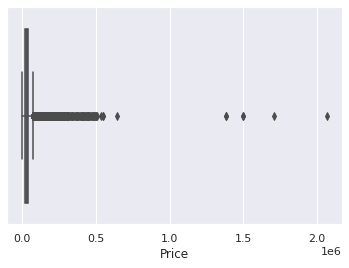

In [23]:
sns.boxplot(x=df['Price'])

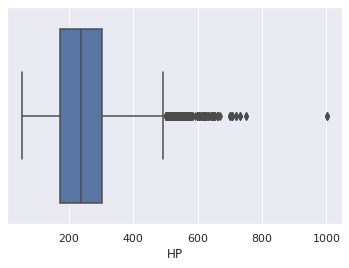

In [24]:
sns.boxplot(x=df['HP'])

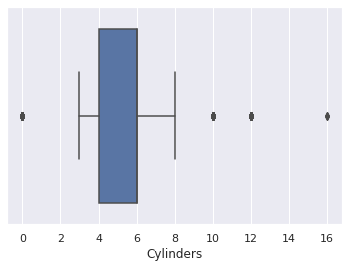

In [25]:
sns.boxplot(x=df['Cylinders'])

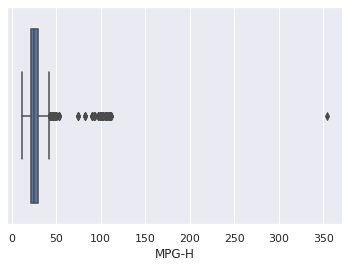

In [26]:
sns.boxplot(x=df['MPG-H'])


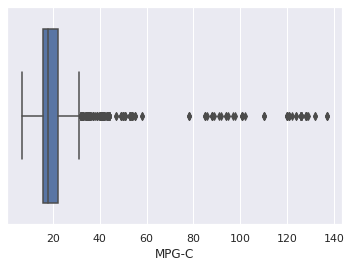

In [27]:
sns.boxplot(x=df['MPG-C'])

**Interquartile range(IQR) score technique**

The outlier removal technique used is Interquartile range(IQR) score technique
The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.



In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   9.0
HP                   130.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
Price              21405.0
dtype: float64


The above output prints the IQR scores, which can be used to detect outliers. The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [29]:
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [30]:
df.shape

(8577, 14)

Checking for outliers after removal using IQR

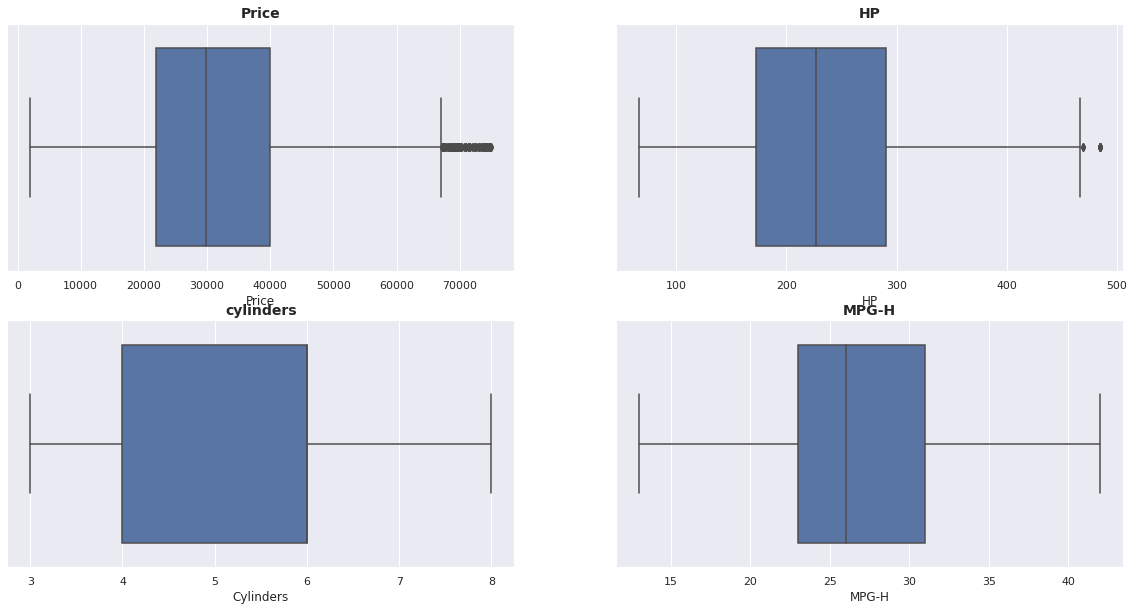

In [31]:
fig= plt.figure(figsize=(20,10))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.boxplot(x=df['Price'])
plt.title('Price', weight='bold', fontsize=14)

#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
sns.boxplot(x=df['HP'])
plt.title('HP', weight='bold', fontsize=14)



#Second row first column

ax1 = plt.subplot2grid((2,2), (1, 0))
sns.boxplot(x=df['Cylinders'])
plt.title('cylinders', weight='bold', fontsize=14)


#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
sns.boxplot(x=df['MPG-H'])
plt.title('MPG-H', weight='bold', fontsize=14)

plt.show()


## Data visualization using scatter and histogram

### 1. Histogram-

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, to know who has the most number of cars we use histogram. Histogram lets us know the total number of car manufactured by a different company.

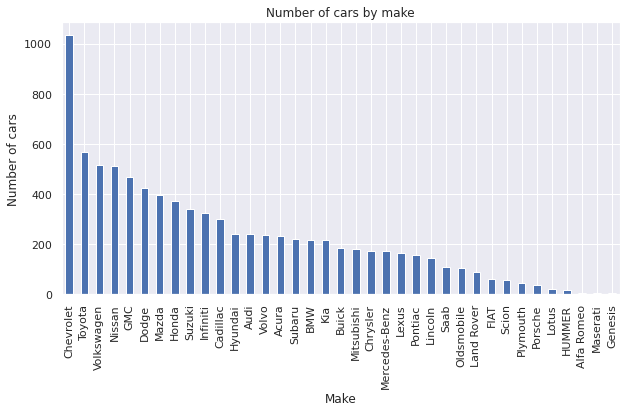

In [32]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

OBSERVATION: 

Chevrolet has the most number of cars with more than 1000 cars

2. Scatter plot-

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. 

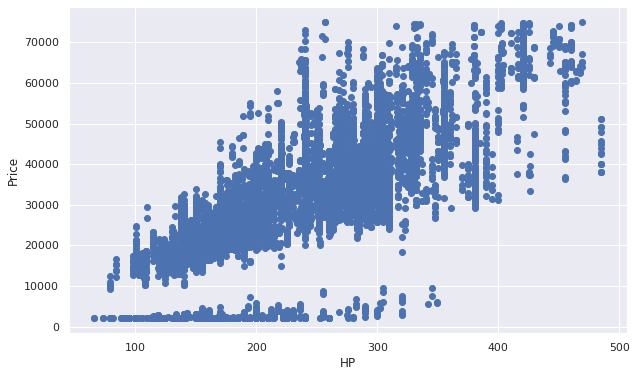

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price']) # Plotting a scatter plot
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

OBSERVATION:

We can see that as the horsepower increases the price also increase . Hence they are positively correlated to each other

# What car brands are the most represented in the dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


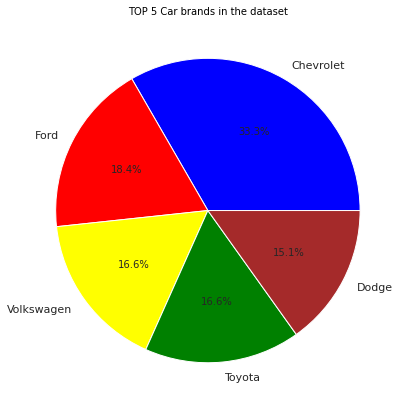

In [34]:
carr=df['Make'].value_counts().head(5).to_frame()
m= carr.style.background_gradient(cmap='Blues')
colors=['blue','red','yellow','green','brown']
labels= ['Chevrolet','Ford','Volkswagen','Toyota','Dodge']
sizes= ['1123','881','809','746','626']
explode=[0.1,0.1,0.1,0.1,0.1]
values=df['Make'].value_counts().head(5).to_frame()

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('TOP 5 Car brands in the dataset',color='black',fontsize=10)
plt.show()

OSERVATION:

Chevrolet, Ford, Volkswagen, Toyota and Dodge are the brands most present in our dataset.

In [35]:
import plotly.graph_objects as go
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# 10 most present labels
popular_labels = counts.index[:10]

# Plot
colors = ['lightslategray',] * len(popular_labels)
colors[0] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=counts[:10],
    y=popular_labels,
    marker_color=colors, # marker color can be a single color value or an iterable
    orientation='h'
)])

fig.update_layout(title_text='Proportion of Car brands',
                  xaxis_title="Percentage",
                  yaxis_title="Car Brand")

OBSERVATION:
Chevrolet is the top car brand

# the average price among the top car brands.

In [36]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28207.045499
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20830.670025
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# correlation

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the correlation between the features can be done using heat maps.

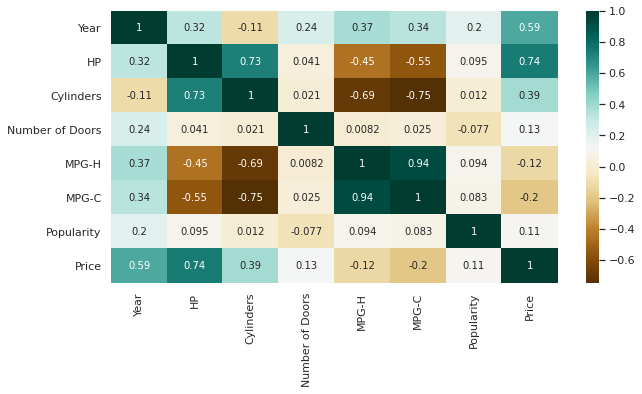

In [37]:
# Finding the relations between the variables.
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)


OBSERVATION:

There is a +ve correlation between:
*  Engine HP and Engine Cylinders 
*  MPG-H and MPG-C
*  Engine Cylinders and MSRP
*  Engine HP and MSRP

There is -ve correlation between :
*  MPG-C and Cylinders
*  MPG-H and Cylinders




## Exporatory Data Analysis

let us now see how each
variables affect the price of the car.

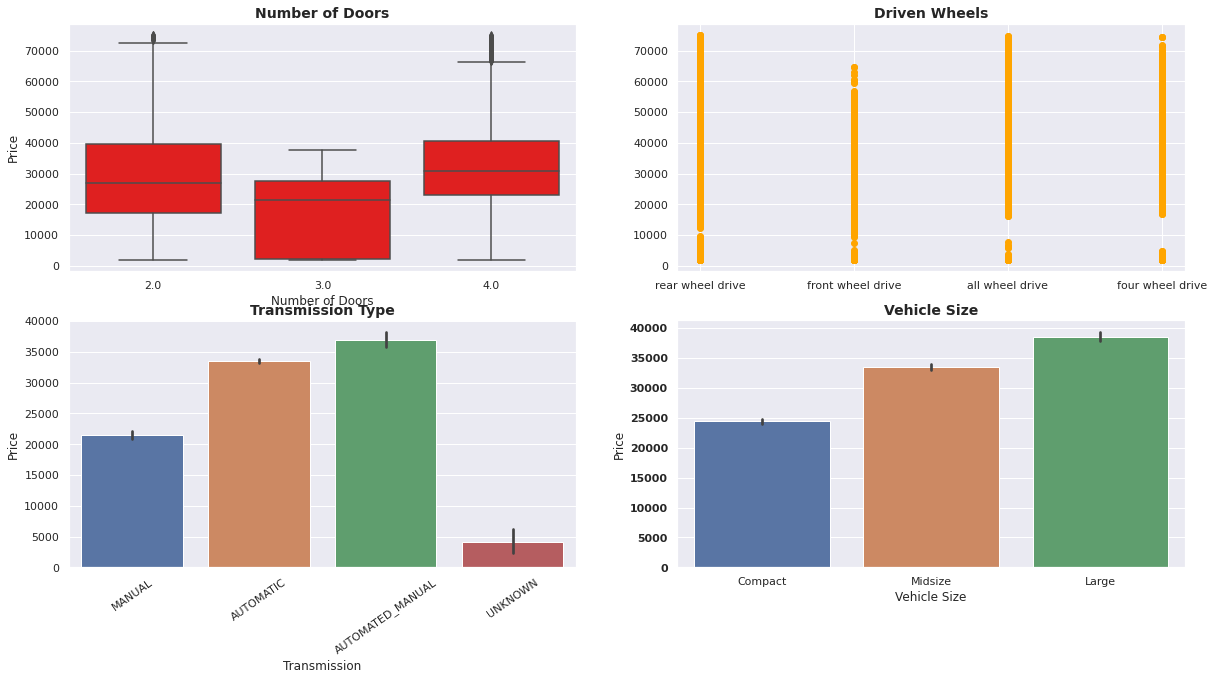

In [38]:
fig= plt.figure(figsize=(20,10))
#2 rows 2 columns
#first row, first columns
ax1 = plt.subplot2grid((2,2),(0,0))
sns.boxplot(x=df['Number of Doors'], y=df['Price'],color='Red')
plt.title('Number of Doors', weight='bold', fontsize=14)

#first row second column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.scatter(x=df['Drive Mode'], y=df['Price'], color='Orange')
plt.title('Driven Wheels', weight='bold', fontsize=14)



#Second row first column

ax1 = plt.subplot2grid((2,2), (1, 0))
sns.barplot(x=df['Transmission'], y=df['Price'])
plt.xticks(rotation=35)
plt.title('Transmission Type', weight='bold', fontsize=14)


#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
sns.barplot(x=df['Vehicle Size'], y=df['Price'])

plt.yticks(weight='bold')
plt.title('Vehicle Size', weight='bold', fontsize=14)



plt.show()

OBSERVATION:

The following contribute to high price of cars

  - Number of doors : Cars with 2 doors 


  - Driven Wheels : All wheel drive 


  - Transmission Type: Automated-Manual 


  - Vehicle Size: Large

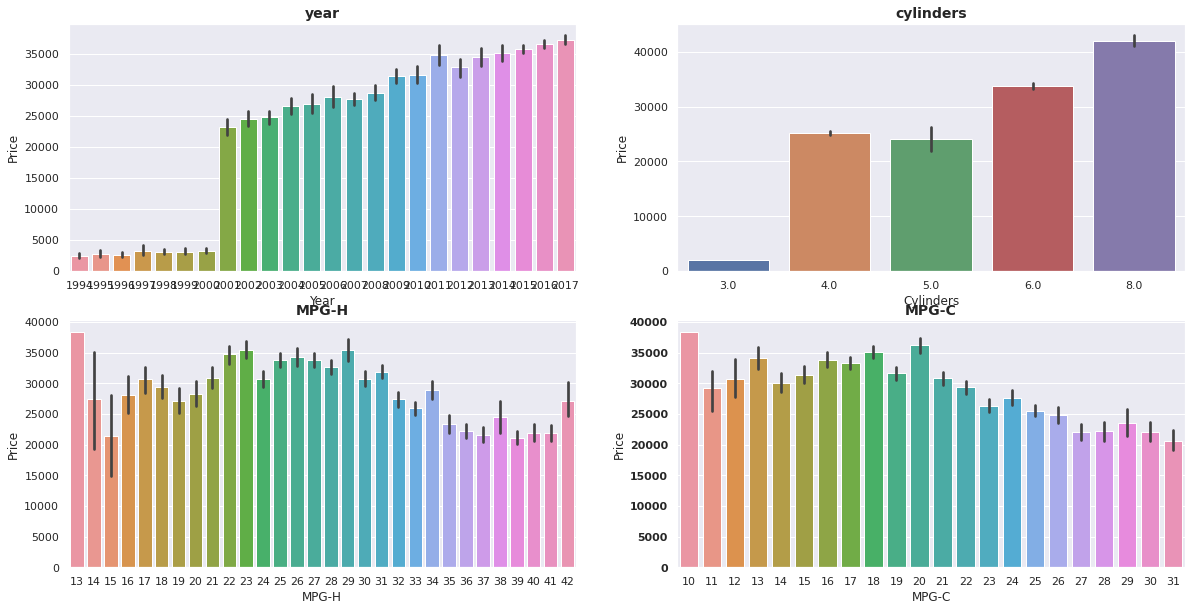

In [39]:
fig= plt.figure(figsize=(20,10))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.barplot(df['Year'],df['Price'])
plt.title('year', weight='bold', fontsize=14)

#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
sns.barplot(df['Cylinders'],df['Price'])
plt.title('cylinders', weight='bold', fontsize=14)



#Second row first column

ax1 = plt.subplot2grid((2,2), (1, 0))
sns.barplot(df['MPG-H'],df['Price'])

plt.title('MPG-H', weight='bold', fontsize=14)


#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
sns.barplot(df['MPG-C'],df['Price'])

plt.yticks(weight='bold')
plt.title('MPG-C', weight='bold', fontsize=14)



plt.show()

OBSERVATION:

*  Car price increased after year 2000
*  More the number of cylinders,more is the car price
*  For MPG-H 13, price is maximum and for MPG-H 15, price is lowest.
*  For MPG-C 10, price is maximum and for MPG-C 31, price is minimum 








## Data pre processing 

In any Machine Learning process, Data Preprocessing is that step in which the data gets transformed, or Encoded, to bring it to such a state that now the machine can easily parse it. In other words, the features of the data can now be easily interpreted by the algorithm.

In [40]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

Split the dataset into 80 and 20 ratio and build a machine learning model with
Price as the target variable

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Use the training set to build an accurate model. Then use the test set to report the accuracy of the model using the following algorithm:


*   Random Forest 
*   Multiple Linear Regression
*   Polynomial Regression
*   Support Vector Machine - Regression (SVR)
*   Decision tree 









## Random forest

In [44]:
#Random forest model training
from sklearn.ensemble import RandomForestRegressor
RFTree=RandomForestRegressor(n_estimators=300,random_state=0)
RFTree.fit(X_train,y_train)
print('Training model done')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training model done


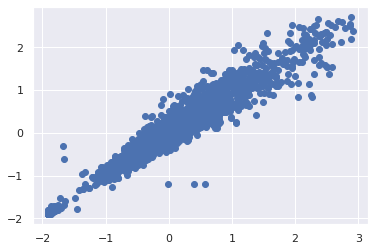

In [46]:
y_pred = RFTree.predict(X_test)
plt.scatter(y_test,y_pred)

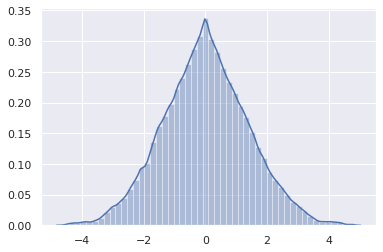

In [47]:
sns.distplot((y_test-y_pred),bins=50)

In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.18441160956499258
Root Mean Squared Error: 0.263178228577163
R2 Score: 0.9295096994093152


In [50]:
print('testing accuracy:',RFTree.score(X_test,y_test))

testing accuracy: 0.9295096994093152


## Multiple Linear Regression

In [51]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

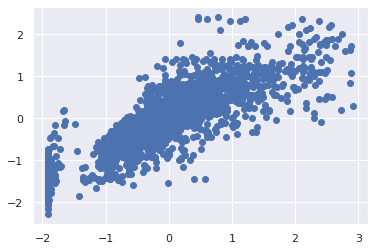

In [52]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

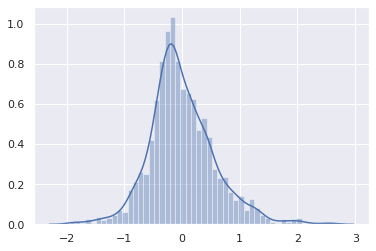

In [53]:
sns.distplot((y_test-y_pred),bins=50)

In [54]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.428935861748091
Root Mean Squared Error: 0.5697839442079168
R2 Score: 0.6695925295175177


In [56]:
print('testing accuracy:',regressor.score(X_test,y_test))

testing accuracy: 0.6695925295175177


## Polynomial Regression

In [61]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
l_reg = LinearRegression()
l_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

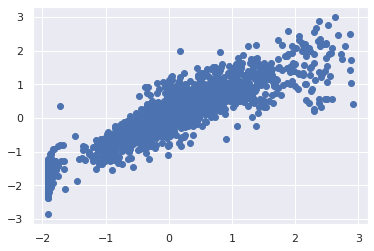

In [62]:
# Predicting a new result with Polynomial Regression
y_pred=l_reg.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

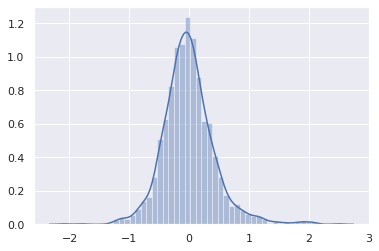

In [63]:
sns.distplot((y_test-y_pred),bins=50)

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31584807869330217
Root Mean Squared Error: 0.4359984733213116
R2 Score: 0.8065363483729309


# Support Vector Machine - Regression (SVR)

In [68]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

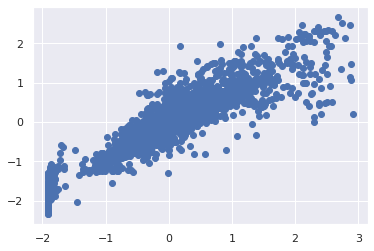

In [69]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

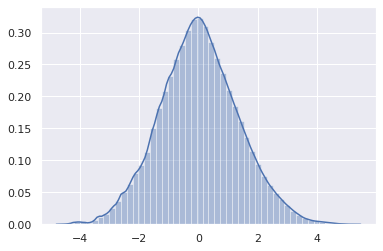

In [70]:
sns.distplot((y_test-y_pred),bins=50)

In [71]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 0.30058067067132577
Root Mean Squared Error: 0.43318406022066136
R2 Score: 0.8090259409353363


In [73]:
print('testing accuracy:',regressor.score(X_test,y_test))

testing accuracy: 0.8090259409353363


## Decision tree 

In [74]:
#Decision tree learning model
from sklearn.tree import DecisionTreeRegressor
print("Starts training model")
Dtree= DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
                             
Dtree_Model=Dtree.fit(X_train,y_train)
print("Trainng model done")

Starts training model
Trainng model done


In [75]:
print(Dtree_Model)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


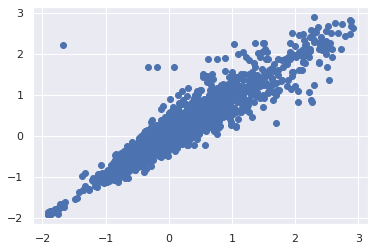

In [76]:
y_pred = Dtree_Model.predict(X_test)
plt.scatter(y_test,y_pred)

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.19718630399762327
Root Mean Squared Error: 0.29660182662708295
R2 Score: 0.9104682473261282


In [80]:
print('testing accuracy:',Dtree_Model.score(X_test,y_test))

testing accuracy: 0.9104682473261282


**CONCLUSION:**

The most accurate model is build using Random Forest 
